# info

This script takes raw XCMS file as input.

The tasks are:
- cell number correction
- separate each of the five patients, which are called Batch in the original file.
- quantile normalization across runs of each individual patient.
    
Then the output should be a visualization of all samples

In [1]:
import pandas, seaborn, numpy

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6)})

# 0. user-defined variables

In [2]:
data_file = '/home/adrian/gd15/hi/research/huvec/data/untargetted/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches_untransformed.xlsx'

# 1. read data

In [3]:
original_data = pandas.read_excel(data_file)
original_data.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,287.490913,468.605181,189.373225,576.720535,...,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,180.314261,538.342307,130.499826,603.217924,...,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,284.725250,346.699905,391.221386,430.336737,...,430.145981,471.505944,371.179769,556.979273,103.571678,1891.004688,1694.637198,1856.663944,1758.452722,1738.477130
3,EC_Rosa_1_695,31,EGM,2,NaN,0,215.383340,632.252573,521.709396,334.036661,...,632.334182,668.358819,546.989703,731.548349,229.357094,1411.265683,1856.889097,2134.864349,2284.850823,2055.847626
4,EC_Rosa_1_711,32,EGM,2,NaN,0,308.400509,461.052002,269.282993,759.247147,...,327.326707,452.810036,324.323485,546.560671,12.509056,1898.663392,2342.170593,2813.164141,2517.026143,2493.479576


In [4]:
info = original_data.iloc[:, :6]
info.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME
0,EC_Rosa_1_659,4,EGM,1,480000.0,0
1,EC_Rosa_1_666,5,EGM,1,480000.0,0
2,EC_Rosa_1_668,3,EGM,1,480000.0,0
3,EC_Rosa_1_695,31,EGM,2,NaN,0
4,EC_Rosa_1_711,32,EGM,2,NaN,0


In [5]:
intensities = original_data.iloc[:, 6:]
intensities.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,287.490913,468.605181,189.373225,576.720535,321.251154,490.368895,6963.243332,1574.419726,205.341230,224.308740,...,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,180.314261,538.342307,130.499826,603.217924,474.653477,426.956672,3643.910179,1315.831068,154.358128,170.502985,...,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,284.725250,346.699905,391.221386,430.336737,513.463286,895.284301,4228.235643,1443.006843,212.677132,391.189120,...,430.145981,471.505944,371.179769,556.979273,103.571678,1891.004688,1694.637198,1856.663944,1758.452722,1738.477130
3,215.383340,632.252573,521.709396,334.036661,463.543369,871.905092,5835.753747,1678.712440,512.057985,1568.892520,...,632.334182,668.358819,546.989703,731.548349,229.357094,1411.265683,1856.889097,2134.864349,2284.850823,2055.847626
4,308.400509,461.052002,269.282993,759.247147,568.430834,580.175396,1893.502277,1910.773244,312.684534,710.027443,...,327.326707,452.810036,324.323485,546.560671,12.509056,1898.663392,2342.170593,2813.164141,2517.026143,2493.479576


In [6]:
peak_names = original_data.columns.to_list()[6:]
print(len(peak_names))
peak_names[:10]

1230


['X59.01097',
 'X61.017890000000001',
 'X67.016220000000004',
 'X74.021450000000002',
 'X77.052040000000005',
 'X77.052049999999994',
 'X78.956580000000002',
 'X78.956770000000006',
 'X79.955420000000004',
 'X80.962869999999995']

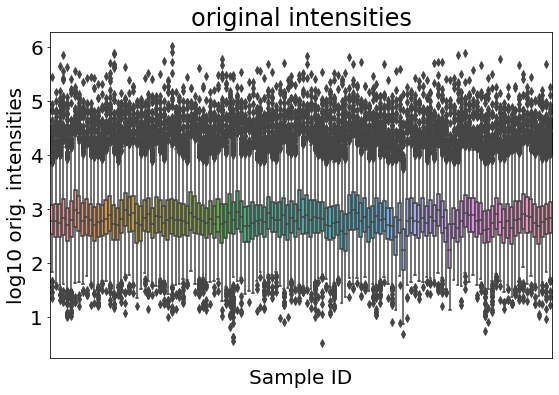

In [7]:
plotting_data = intensities.transpose()
plotting_data.head()

g = seaborn.boxplot(data=numpy.log10(plotting_data))
g.set(xticklabels=[], ylabel='log10 orig. intensities', xlabel='Sample ID', title='original intensities')
g.tick_params(bottom=False)
matplotlib.pyplot.show()

# 2. normalize data by cell numbers

In [8]:
intensities_by_cell = intensities.div(original_data['Cell  number']/1e6, axis=0)
intensities_by_cell.head(10)

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,...,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,...,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,...,896.137460,982.304050,773.291185,1160.373486,215.774329,3939.593101,3530.494163,3868.049883,3663.443171,3621.827354
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,621.152501,1825.424702,467.294062,2333.133711,1907.808060,2790.453418,23646.966493,8010.429693,660.939824,654.341910,...,2698.087973,2887.812940,2308.506988,2334.598693,2034.044873,9038.588512,11058.163249,12333.298055,12270.745784,10790.108692


In [9]:
normalized_met_by_cell = pandas.concat([info, intensities_by_cell.reindex(info.index)], axis=1)
normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,...,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,...,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,...,896.137460,982.304050,773.291185,1160.373486,215.774329,3939.593101,3530.494163,3868.049883,3663.443171,3621.827354
3,EC_Rosa_1_695,31,EGM,2,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EC_Rosa_1_711,32,EGM,2,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. remove conditions without cell numbers

In [10]:
# remove conditions for which cell numbers are not available
print('conditions before filtering {}'.format(normalized_met_by_cell.shape[0]))
finite_normalized_met_by_cell = normalized_met_by_cell[numpy.isfinite(normalized_met_by_cell['Cell  number']) == True]
print('conditions after filtering {}'.format(finite_normalized_met_by_cell.shape[0]))

conditions before filtering 130
conditions after filtering 121


In [11]:
finite_normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,...,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,...,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,...,896.137460,982.304050,773.291185,1160.373486,215.774329,3939.593101,3530.494163,3868.049883,3663.443171,3621.827354
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,621.152501,1825.424702,467.294062,2333.133711,...,2698.087973,2887.812940,2308.506988,2334.598693,2034.044873,9038.588512,11058.163249,12333.298055,12270.745784,10790.108692
10,EC_Rosa_1_805,84,EGM,4,270000.0,0,761.738204,1880.681355,346.274473,2111.788781,...,1861.632957,2131.258746,1706.691679,2467.284050,1637.665077,8454.690040,10424.083896,11610.791792,10437.888669,9955.916753


# 4. bring it all to log10

In [12]:
info = finite_normalized_met_by_cell.iloc[:, :6]
data = finite_normalized_met_by_cell.iloc[:, 6:]
transformed = data.apply(numpy.log10)
log10_finite_normalize_met_by_cell = pandas.concat([info, transformed.reindex(info.index)], axis=1)
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,...,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,...,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,...,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,...,3.431056,3.460569,3.363331,3.368212,3.308361,3.956101,4.043683,4.091079,4.088871,4.033026
10,EC_Rosa_1_805,84,EGM,4,270000.0,0,2.881806,3.274315,2.539420,3.324650,...,3.269894,3.328636,3.232155,3.392219,3.214225,3.927098,4.018038,4.064862,4.018613,3.998081


[Text(0, 0.5, 'log10 Intensity'), Text(0.5, 0, 'Peak ID')]

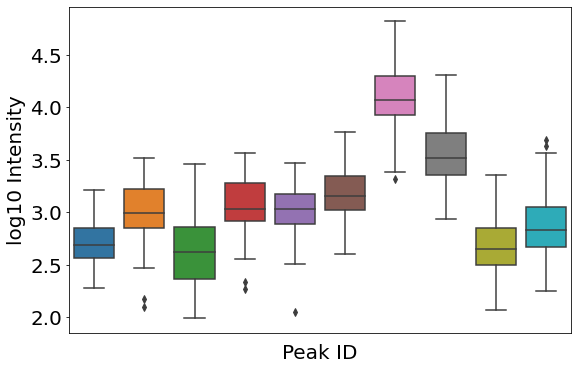

In [13]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:10]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')

# 5. break in to patient specific samples. then perform quantile normalization

In [15]:
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,...,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,...,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,...,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,...,3.431056,3.460569,3.363331,3.368212,3.308361,3.956101,4.043683,4.091079,4.088871,4.033026
10,EC_Rosa_1_805,84,EGM,4,270000.0,0,2.881806,3.274315,2.539420,3.324650,...,3.269894,3.328636,3.232155,3.392219,3.214225,3.927098,4.018038,4.064862,4.018613,3.998081


1


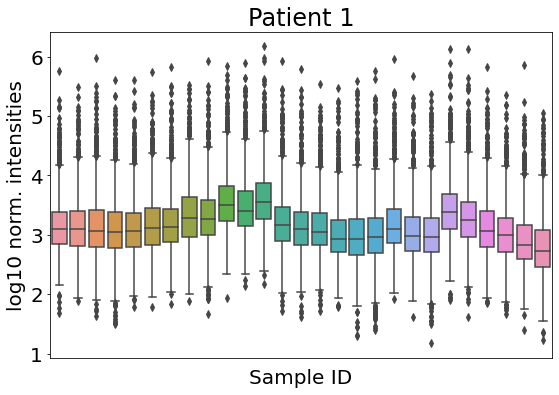

2


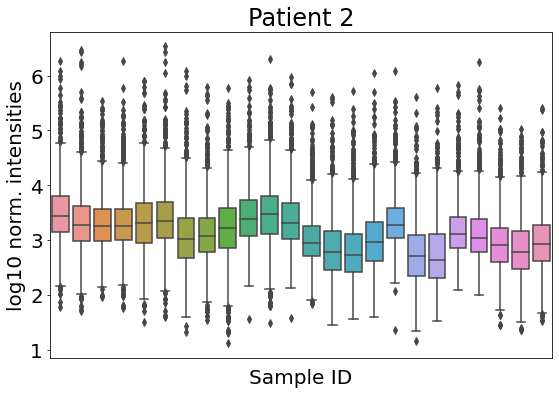

In [22]:
batches = [1, 2, 3, 4, 5]
for batch in batches[:2]:
    print(batch)
    
    patient_df = log10_finite_normalize_met_by_cell[log10_finite_normalize_met_by_cell['Batch'] == batch]
    print(patient_df.shape)
    
    ###
    ### plot intensities before QN
    ###
    tdf = patient_df.transpose()
    tdf.drop(['Unnamed: 0', 'Number', 'Treatment', 'Batch', 'Cell  number', 'TIME'], axis=0, inplace=True)
    tdf.head()
    
    g = seaborn.boxplot(data=tdf)
    g.set(xticklabels=[], ylabel='log10 norm. intensities', xlabel='Sample ID', title='Patient {}'.format(batch))
    g.tick_params(bottom=False)
    matplotlib.pyplot.show()
    
    ###
    ### quantile normalization
    ###
    
    # step 1/3: sorting sample values
    df_sorted = pandas.DataFrame(numpy.sort(tdf.values, axis=0), index=tdf.index, columns=tdf.columns)
    # step 2/3: averaging rank values across samples
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = numpy.arange(1, len(df_mean) + 1)
    # step 3/3: re-ordering samples
    tdf.rank(method="min").astype(int)
    df_qn = tdf.rank(method="min").stack().astype(int).map(df_mean).unstack()
    
    check the method min or max
    
    # plot intensities after QN

In [20]:
patient_df

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
15,EC_Rosa_1_698,36,1,2,275000.0,4,3.011602,3.245218,3.286735,3.331705,...,3.521814,3.458138,3.448743,3.460900,3.091848,3.867957,3.951214,4.037004,3.821931,3.994386
16,EC_Rosa_1_702,38,1,2,275000.0,4,2.923471,3.325757,2.555702,3.282162,...,2.984442,3.070960,2.932339,3.333045,1.719316,3.818134,3.949260,4.029746,3.983915,3.952476
17,EC_Rosa_1_716,37,1,2,275000.0,4,2.865108,3.087892,2.604274,3.344055,...,3.125738,3.151152,2.957083,3.376518,2.672328,3.967315,4.089343,3.909584,4.089502,4.066471
29,EC_Rosa_1_700,41,10,2,305000.0,4,2.921995,3.224312,2.483045,3.222626,...,2.866377,2.908401,2.770921,3.244283,1.990767,3.803443,3.951631,4.086889,3.953450,3.956216
30,EC_Rosa_1_709,39,10,2,305000.0,4,2.854156,3.165822,2.891538,3.273656,...,3.370103,3.375075,3.241455,3.241480,1.507934,3.731499,3.837246,3.895292,3.865608,3.843691
31,EC_Rosa_1_727,40,10,2,305000.0,4,2.848933,3.256317,2.678974,3.300558,...,3.181437,3.231405,3.122403,3.385367,1.709848,3.799981,3.957699,3.739342,4.001144,3.990272
44,EC_Rosa_1_693,43,100,2,485000.0,4,2.759700,2.850489,2.590232,2.990862,...,2.883474,2.947952,2.950673,3.118394,1.914529,3.464097,3.555576,3.627289,3.626746,3.351044
45,EC_Rosa_1_697,42,100,2,485000.0,4,2.697455,2.737274,2.297663,2.937360,...,2.859677,2.905891,2.804625,3.107952,2.131065,3.580229,3.461520,3.804815,3.750981,3.709479
46,EC_Rosa_1_704,44,100,2,485000.0,4,2.611953,3.020245,2.550414,3.112835,...,3.272323,3.225028,3.215187,3.206579,1.363314,3.642288,3.901703,3.894716,3.561833,3.746341
59,EC_Rosa_1_717,33,EGM,2,255000.0,4,2.910617,3.380202,3.180133,3.374121,...,2.915369,2.944100,2.737119,3.467634,2.354616,3.879054,4.054096,4.127511,4.062992,4.012055
